### Import Libraries and define constants

In [101]:
import torch
import torch.nn as nn
import numpy as np
device = torch.device("cuda:0")

In [103]:
N = 2 #Input size, corresponds to antecedent space dimension
learning_rate = 0.05
training_steps = 20000
grid_length = 100

### Define neural network structure

In [104]:
multilayer_perceptron = nn.Sequential(
    nn.Linear(N, 10),
    nn.ELU(),
    nn.Linear(10, 10),
    nn.ELU(),
    nn.Linear(10, 1)
)

print(multilayer_perceptron)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=10, out_features=1, bias=True)
)


In [106]:
# Universal Approximator
def g(x):
  N_x = multilayer_perceptron(x)
  return N_x

# Given EDO
def f(x):
  return 2*np.pi**2*np.sin(np.pi*x[:,0])*np.sin(np.pi*x[:,1])

# Loss function
loss_fct = nn.MSELoss()
optimizer = torch.optim.Adam(multilayer_perceptron.parameters())

In [107]:
X = np.linspace(0, 1, grid_length)
Y = np.linspace(0, 1, grid_length)

Z = np.array([[x,y] for x in X for y in Y])
Z_values = torch.FloatTensor(f(Z)).unsqueeze(1)
Z_training = torch.FloatTensor(Z)
print(Z_training.size())

torch.Size([10000, 2])


In [108]:
multilayer_perceptron.train(True)

for epoch in range(training_steps):
    optimizer.zero_grad()

    Z_out = multilayer_perceptron(Z_training)
    loss = loss_fct(Z_out, Z_values)
    loss.backward()

    optimizer.step()
    
    if epoch%100==99:
        print("Epoch n°{}: ".format(epoch+1), loss.item())
    
multilayer_perceptron.train(False)

Epoch n°100:  71.76979064941406
Epoch n°200:  43.37754440307617
Epoch n°300:  34.31794738769531
Epoch n°400:  34.10141372680664
Epoch n°500:  34.055233001708984
Epoch n°600:  34.00678253173828
Epoch n°700:  33.95606231689453
Epoch n°800:  33.90243911743164
Epoch n°900:  33.84440612792969
Epoch n°1000:  33.7794189453125
Epoch n°1100:  33.704345703125
Epoch n°1200:  33.616668701171875
Epoch n°1300:  33.51438903808594
Epoch n°1400:  33.393035888671875
Epoch n°1500:  33.23979187011719
Epoch n°1600:  32.99338912963867
Epoch n°1700:  32.61759948730469
Epoch n°1800:  32.119903564453125
Epoch n°1900:  31.298643112182617
Epoch n°2000:  29.823162078857422
Epoch n°2100:  27.451337814331055
Epoch n°2200:  23.847553253173828
Epoch n°2300:  20.423397064208984
Epoch n°2400:  17.815242767333984
Epoch n°2500:  15.416015625
Epoch n°2600:  12.262018203735352
Epoch n°2700:  7.62716007232666
Epoch n°2800:  3.6773416996002197
Epoch n°2900:  2.2421042919158936
Epoch n°3000:  1.781856656074524
Epoch n°3100:  

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ELU(alpha=1.0)
  (4): Linear(in_features=10, out_features=1, bias=True)
)

### Display results

In [109]:
import matplotlib.pyplot as plt

X_noise = X + (np.random.rand(grid_length)-0.5)/grid_length
Y_noise = Y + (np.random.rand(grid_length)-0.5)/grid_length
Z_validation = multilayer_perceptron(torch.FloatTensor(np.array([[x,y] for x in X for y in Y])))

(0.0, 100.0, 0.0, 100.0)

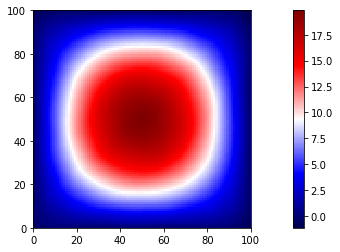

In [110]:
plt.pcolormesh(torch.reshape(Z_validation, (grid_length, grid_length)).detach().numpy(), cmap="seismic")
plt.colorbar()
plt.axis("square")

(0.0, 100.0, 0.0, 100.0)

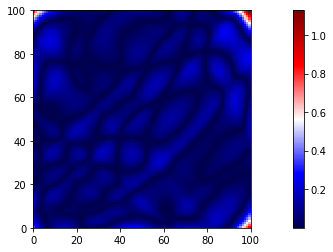

In [111]:
"""
Error with true function
"""
error = torch.abs(Z_validation - Z_values)
plt.pcolormesh(torch.reshape(error, (grid_length, grid_length)).detach().numpy(), cmap="seismic")
plt.colorbar()
plt.axis("square")